In [1]:
from ase.io import read
import numpy as np

#load the output file
dat = read("prediction.xyz", ":") 

In [2]:
from aseMolec import pltProps as pp
from aseMolec import extAtoms as ea

# Get the Energy data from dat
REF_energy_0 = ea.get_prop(dat, 'info', 'REF_energy_0', True)
MACE_energy = ea.get_prop(dat, 'info', 'MACE_energy', True)


0.016244445212211144

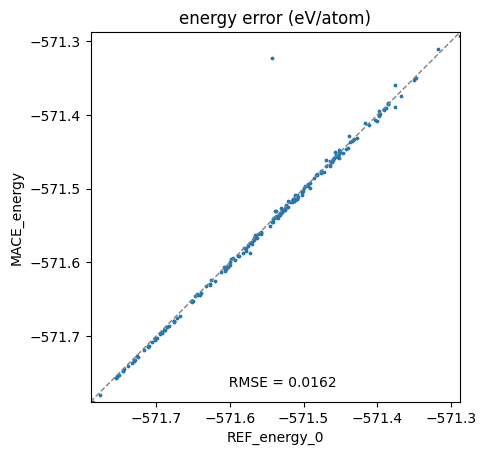

In [3]:
# Correlation plot for real vs predicted energies
pp.plot_prop(REF_energy_0, MACE_energy, title= "energy error (eV/atom)", labs=["REF_energy_0", "MACE_energy"])

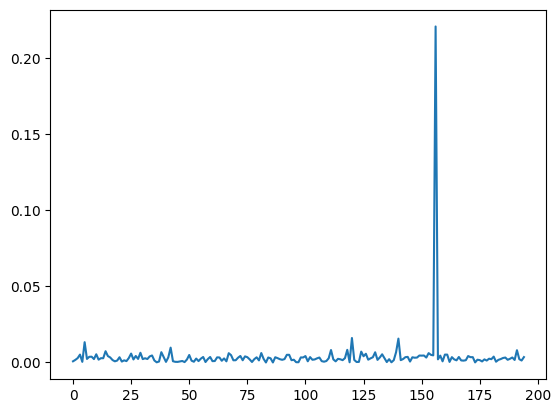

In [4]:
from matplotlib import pyplot as plt

# Finding the anomaly conformation
err = np.abs(REF_energy_0 - MACE_energy)
plt.plot(err)
idx = np.where(err>0.2)[0][0]


In [5]:
import nglview as nv

# Viewing the anomaly conformation
nv.show_ase(dat[idx])

NGLWidget()

In [6]:
import numpy as np 

# Getting and listing the forces data 
REF_forces_0 = np.concatenate(ea.get_prop(dat, 'arrays', 'REF_forces_0')).flatten()
MACE_forces = np.concatenate(ea.get_prop(dat, 'arrays', 'MACE_forces')).flatten()

0.07716626767065153

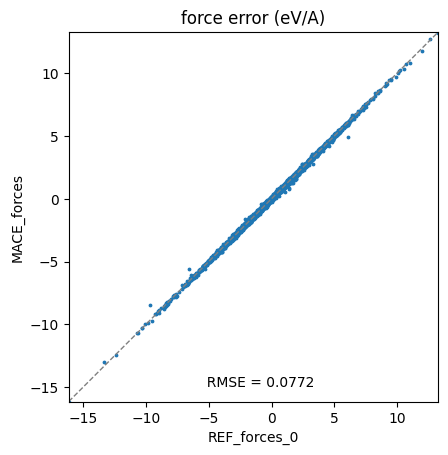

In [7]:
# Correlation plot for real vs predicted forces
pp.plot_prop(REF_forces_0, MACE_forces, title= "force error (eV/A)", labs=["REF_forces_0", "MACE_forces"])